# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
# 1
df = df.drop_duplicates()
df = df.dropna()
df.shape

(12427, 15)

In [5]:
X = df.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'])
X.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [6]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=100)

In [7]:
# 2
modelo = patsy.dmatrices('renda ~ C(sexo, Treatment("F")) + C(tipo_renda, Treatment("Assalariado")) + \
           C(educacao, Treatment("Secundário")) + C(estado_civil, Treatment("Casado")) + \
           C(tipo_residencia, Treatment("Casa")) + posse_de_veiculo + posse_de_imovel + \
           qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia',
   X_test)
modelo

(DesignMatrix with shape (3107, 1)
      renda
   11019.60
    3442.40
    3556.27
    4323.18
   10022.42
    3356.47
    9532.76
   10014.83
    2385.62
   15913.06
    1458.57
    7240.23
    3071.27
    5132.72
    2472.82
    2016.82
    4511.68
     991.06
   11263.82
    3755.02
   12568.79
   29039.58
   10691.27
   14280.82
    2472.87
    6690.73
    9771.39
    2295.47
   20578.95
   10328.90
   [3077 rows omitted]
   Terms:
     'renda' (column 0)
   (to view full data, use np.asarray(this_obj)),
 DesignMatrix with shape (3107, 25)
   Columns:
     ['Intercept',
      'C(sexo, Treatment("F"))[T.M]',
      'C(tipo_renda, Treatment("Assalariado"))[T.Bolsista]',
      'C(tipo_renda, Treatment("Assalariado"))[T.Empresário]',
      'C(tipo_renda, Treatment("Assalariado"))[T.Pensionista]',
      'C(tipo_renda, Treatment("Assalariado"))[T.Servidor público]',
      'C(educacao, Treatment("Secundário"))[T.Primário]',
      'C(educacao, Treatment("Secundário"))[T.Pós graduação]',
   

In [8]:
alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    print(f'R² = {md.rsquared} | R² Adj= {md.rsquared_adj} Alpha = {i} ')

R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.1 


Para todos os valores de alfa testados não houve alteração do R² e do R² Ajustado.

In [9]:
# 3
for i in alpha:
    md = smf.ols(modelo, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    print(f'R² = {md.rsquared} | R² Adj= {md.rsquared_adj} Alpha = {i} ')

R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 | R² Adj= 0.2983876762173435 Alpha = 0.1 


Também não houve alterações entre os modelos ridge e lasso no valor de R².

In [10]:
# 4
X = pd.get_dummies(X_test, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X = X.astype(float)
y = np.array(X_test[['renda']])



def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  renda                          with p-value 0.0
#############
['renda']
Add  tempo_emprego                  with p-value 0.0
#############
['renda', 'tempo_emprego']
Add  idade                          with p-value 1.62745e-45
#############
['renda', 'tempo_emprego', 'idade']
Add  qtd_filhos                     with p-value 8.47946e-28
#############
['renda', 'tempo_emprego', 'idade', 'qtd_filhos']
Add  estado_civil_Separado          with p-value 4.08152e-12
#############
['renda', 'tempo_emprego', 'idade', 'qtd_filhos', 'estado_civil_Separado']
Add  posse_de_veiculo_True          with p-value 1.05857e-60
#############
['renda', 'tempo_emprego', 'idade', 'qtd_filhos', 'estado_civil_Separado', 'posse_de_veiculo_True']
Drop qtd_filhos                     with p-value 1.0
Add  qtd_filhos                     with p-value 2.3889e-41
#############
['renda', 'tempo_emprego', 'idade', 'estado_civil_Separado', 'posse_de_veiculo_True', 'qtd_filhos']
Add  tipo_renda_Servidor público    with 

In [11]:
reg_stepwise = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.662e+33
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:48:30   Log-Likelihood:                 79264.
No. Observations:                3107   AIC:                        -1.585e+05
Df Residuals:                    3093   BIC:                        -1.584e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -6.537e-12   4.36e-13    -14.984      0.000   -7.39e-12   -5.68e-12
renda                            1.0000   4.94e-18   2.02e+17      0.000       1.000       1.000
qtd_filhos                    5.969e-13   5.02e-14     11.896      0.000    4.98e-13    6.95e-13
idade                         1.315e-13   4.31e-15     30.510      0.000    1.23e-13     1.4e-13
estado_civil_Solteiro         8.811e-13   1.13e-13      7.768      0.000    6.59e-13     1.1e-12
estado_civil_União            2.842e-13   1.44e-13      1.975      0.048    2.07e-15    5.66e-13
educacao_Secundário           2.046e-12      4e-13      5.120      0.000    1.26e-12    2.83e-12
educacao_Superior incompleto -9.095e-13   4.36e-13     -2.086      0.037   -1.76e-12   -5.45e-14
educacao_Superior completo    7.958e-13   4.01e-13      1.985      0.047    9.62e-15    1.58e-12
tipo_residencia_Estúdio      -3.183e-12   4.15e-13     -7.668      0.000      -4e-12   -2.37e-12
tipo_renda_Empresário         1.705e-13   8.34e-14      2.046      0.041    7.08e-15    3.34e-13
posse_de_veiculo_True         2.132e-13   7.86e-14      2.710      0.007     5.9e-14    3.67e-13
sexo_M                        8.811e-13   8.55e-14     10.309      0.000    7.14e-13    1.05e-12
tipo_renda_Servidor público   9.663e-13   1.24e-13      7.823      0.000    7.24e-13    1.21e-12
==============================================================================
Omnibus:                      940.465   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4447.132
Skew:                           1.379   Prob(JB):                         0.00
Kurtosis:                       8.172   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5 e 6
O valor do R² utilizando o método Stepwise foi de 100%. Não há como melhorar esse resultado. Porém, pode ser um forte indício que o modelo está overfitado. Vale lembrar que esse modelo foi criado utilizando a base de teste que representa apenas 25% da base de dados utilizada.

In [12]:
# 7
X_train = pd.get_dummies(X_train, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train = X_train.astype(float)
y_train = np.array(X_train[['renda']])

In [13]:
arv_regr = DecisionTreeRegressor(max_depth=4)

arv_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

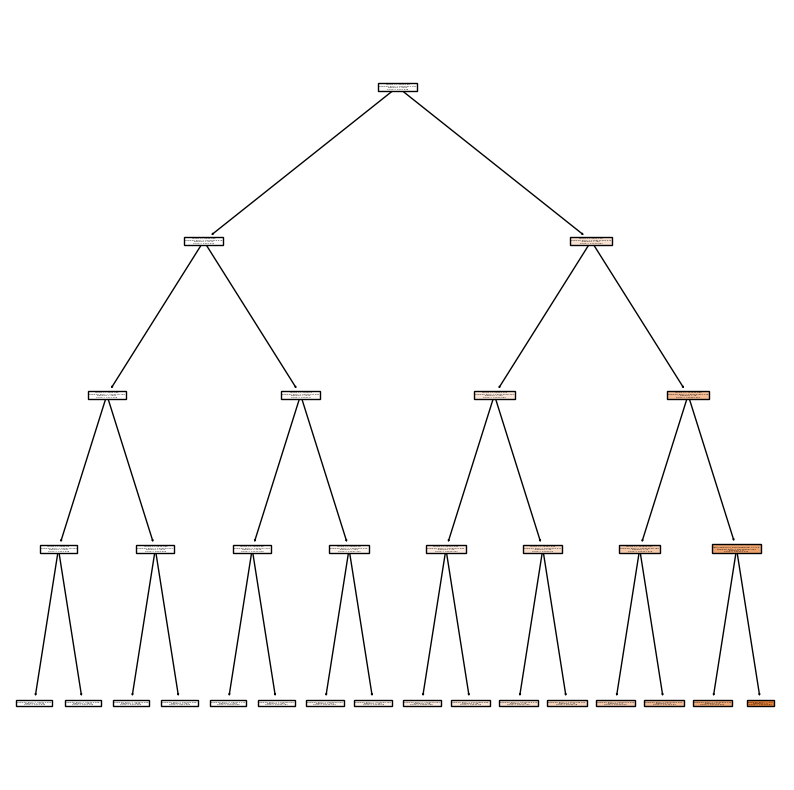

In [14]:
plt.rc('figure', figsize=(10, 10))

arvore = plot_tree(arv_regr, 
                   feature_names=X_train.columns.tolist(),
                   filled=True)


In [15]:
r_quad = arv_regr.score(X_train, y_train)

template = 'O R-quadrado da árvore de treino com profundidade = {0} é: {1:.2f}'

print(template.format(arv_regr.get_depth(),r_quad).replace(".",","))

O R-quadrado da árvore de treino com profundidade = 4 é: 0,99
